## name: Rahul Pawar
## roll no: BEAD22571
## batch: A4

In [2]:
!pip install torch torchvision torchaudio
!pip install matplotlib
!pip install opencv-python-headless
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install scikit-image
!pip install tqdm
!pip install pycocotools

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/241.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/241.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/241.3 MB 1.1 MB/s eta 0:03:44
   ---------------------------------------- 0.5/241.3 MB 1.1 MB/s eta 0:03:44
   ---------------------------------------- 0.8/241.3 MB 801.5 kB/s eta 0:05:01
   ---------------------------------------- 0.8/241.3 MB 801.5 kB/s eta 0:05:01
   ---------------------------------------- 1.0/241.3 MB 682.0 kB/s eta 0:05:53
   ---------------------------------------- 1.0/241.3 MB 682.0 kB/s eta 0:05:53
   ---------------------------------------- 1.3/241.3 MB 623.2 kB/s eta 0:06:26
   ---------------------------------------- 1.3/241.3 MB 623.2 kB/s eta 0:06:26
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 531.8 kB/s eta 0:00:24
   - -------------------------------------- 0.5/12.9 MB 531.8 kB/s eta 0:00:24
   - -------------------------------------- 0.5/12.9 MB 531.8 kB/s eta 0:00:24
   - -------------------------------------- 0.5/12.9 MB 531.8 kB/s eta 0:00:24
   - -----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
import random
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim


In [4]:
# Original dataset path
data_dir = Path(r"C:\Users\Admin\Downloads\archive\mammals")

# Output path for train/val/test split
output_dir = Path(r"C:\Users\Admin\Downloads\archive\mammals_split")
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

In [5]:
# Make directories
for split in ['train','val','test']:
    (output_dir/split).mkdir(parents=True, exist_ok=True)

# Split images
for class_dir in os.listdir(data_dir):
    class_path = data_dir/class_dir
    if not os.path.isdir(class_path):
        continue
    images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
    random.shuffle(images)
    n_total = len(images)
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)
    
    splits = {
        'train': images[:n_train],
        'val': images[n_train:n_train+n_val],
        'test': images[n_train+n_val:]
    }
    
    for split_name, split_images in splits.items():
        target_dir = output_dir/split_name/class_dir
        target_dir.mkdir(parents=True, exist_ok=True)
        for img in split_images:
            shutil.copy(class_path/img, target_dir/img)

print("Dataset split completed!")

Dataset split completed!


In [6]:
# Transformations
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(output_dir/'train', transform=transform)
val_dataset = datasets.ImageFolder(output_dir/'val', transform=transform)
test_dataset = datasets.ImageFolder(output_dir/'test', transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Classes
print("Classes:", train_dataset.classes)

Classes: ['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 'armadillo', 'baboon', 'badger', 'blue_whale', 'brown_bear', 'camel', 'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 'otter', 'polar_bear', 'porcupine', 'red_panda', 'rhinoceros', 'sea_lion', 'seal', 'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']


In [7]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [01:20<00:00, 578kB/s]


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

Epoch 1/5 - Loss: 1.9997 - Accuracy: 0.4528
Epoch 2/5 - Loss: 1.1567 - Accuracy: 0.6674
Epoch 3/5 - Loss: 0.8103 - Accuracy: 0.7612
Epoch 4/5 - Loss: 0.5873 - Accuracy: 0.8236
Epoch 5/5 - Loss: 0.4524 - Accuracy: 0.8603


In [10]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {correct/total:.4f}')

Validation Accuracy: 0.7159


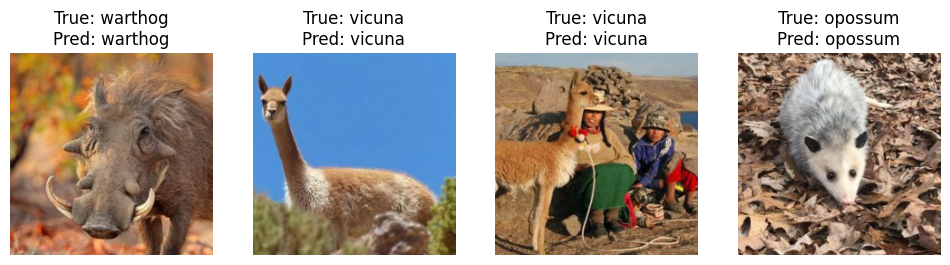

In [11]:
plt.figure(figsize=(12,6))

for i in range(4):
    idx = random.randint(0, len(val_dataset)-1)
    img, label = val_dataset[idx]
    input_img = img.unsqueeze(0).to(device)
    output = model(input_img)
    _, pred = torch.max(output.data, 1)
    
    img_show = img.permute(1,2,0).numpy()
    img_show = img_show * [0.229,0.224,0.225] + [0.485,0.456,0.406]
    img_show = img_show.clip(0,1)
    
    plt.subplot(1,4,i+1)
    plt.imshow(img_show)
    plt.title(f'True: {train_dataset.classes[label]}\nPred: {train_dataset.classes[pred.item()]}')
    plt.axis('off')
plt.show()